In [63]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew, kurtosis, mode, zscore, norm
from scipy.special import boxcox1p

# Pipeline and machine learning algorithms
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [64]:
# It is your job to predict the sales price for each house. 
# For each Id in the test set, you must predict the value of the SalePrice variable. 

# Load Data and Explore

Join Train and Test set so changes are made on both

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test2=pd.read_csv("test.csv")
len_train=train.shape[0]
houses=pd.concat([train,test], sort=False)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# Exploratory data analysis (EDA)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
houses.select_dtypes(include='object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
houses.select_dtypes(include=['float','int']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


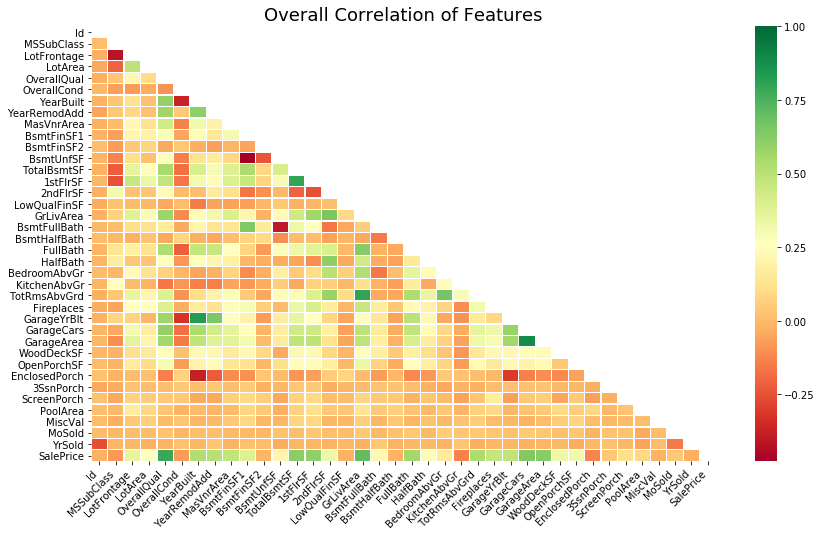

In [10]:
# Initiate correlation matrix
corrmat = houses.corr()

# Set-up mask
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set-up figure
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of Features', fontsize=18)
ax = sns.heatmap(corrmat, mask=mask, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})

# Fix bug in heatmap to display full high rows on top and bottom
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

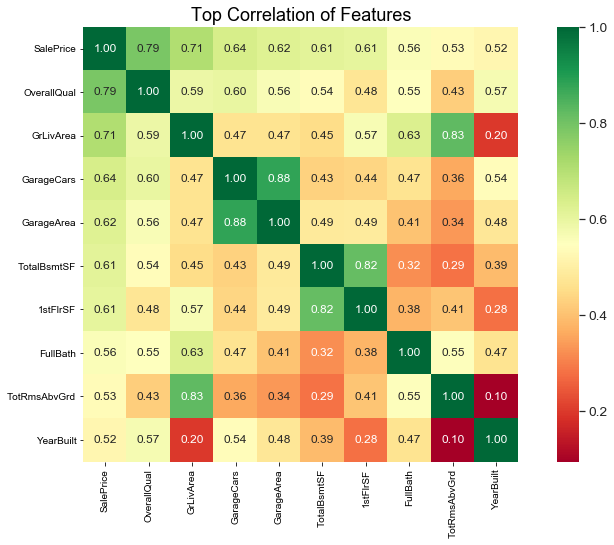

In [11]:
#saleprice correlation matrix
#set top number of variables for heatmap
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(14, 8))
plt.title('Top Correlation of Features', fontsize=18)
sns.set(font_scale=1.25)
ax = sns.heatmap(cm, cbar=True, annot=True, cmap='RdYlGn', square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [12]:
houses.select_dtypes(include='object').isnull().sum()[houses.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

# Feature engineering

In [13]:
houses["PoolQC"] = houses["PoolQC"].fillna("None")
houses["MiscFeature"] = houses["MiscFeature"].fillna("None")
houses["Alley"] = houses["Alley"].fillna("None")
houses["Fence"] = houses["Fence"].fillna("None")
houses["FireplaceQu"] = houses["FireplaceQu"].fillna("None")

In [14]:
houses["LotFrontage"] = houses.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [15]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    houses[col] = houses[col].fillna('None')

In [16]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    houses[col] = houses[col].fillna(0)

In [17]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    houses[col] = houses[col].fillna(0)

In [18]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    houses[col] = houses[col].fillna('None')

In [19]:
houses["MasVnrType"] = houses["MasVnrType"].fillna("None")
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0)

In [20]:
houses['MSZoning'] = houses['MSZoning'].fillna(houses['MSZoning'].mode()[0])
houses["Functional"] = houses["Functional"].fillna("Typ")
houses['MSSubClass'] = houses['MSSubClass'].fillna("None")

In [21]:
houses = houses.drop(['Utilities'], axis=1)

In [22]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    houses[col] = houses[col].fillna(houses[col].mode()[0])

In [23]:
#Check remaining missing values if any 
houses_na = (houses.isnull().sum() / len(houses)) * 100
houses_na = houses_na.drop(houses_na[houses_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :houses_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


In [24]:
# Converting some numerical variables that are really categorical type.

houses['MSSubClass'] = houses['MSSubClass'].apply(str)
houses['OverallCond'] = houses['OverallCond'].astype(str)
houses['YrSold'] = houses['YrSold'].astype(str)
houses['MoSold'] = houses['MoSold'].astype(str)

# Label Encoding

In [25]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(houses[c].values)) 
    houses[c] = lbl.transform(list(houses[c].values))

# shape        
print('Shape all_data: {}'.format(houses.shape))

Shape all_data: (2919, 80)


In [26]:
houses['TotalSF'] = houses['TotalBsmtSF'] + houses['1stFlrSF'] + houses['2ndFlrSF']

# Fix Skewness in Data

In [27]:
skewness = pd.DataFrame(houses.skew(axis = 0, skipna = True).sort_values(ascending=False), columns=['Skew'])
skewness.head(20)

,Skew
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
LandSlope,4.977715
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat != 'SalePrice':
        houses[feat] = boxcox1p(houses[feat], lam)

There are 61 skewed numerical features to Box Cox transform


In [29]:
houses=pd.get_dummies(houses)
houses

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.000000,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,1.194318,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.000000,2.259674,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,1.540963,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,1.820334,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,2.055642,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,15.394418,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,...,0,0,0,1,0,0,0,0,1,0
1455,15.395553,1.194318,3.932510,14.013314,0.730463,0.730463,1.540963,0.000000,1.820334,1.820334,...,0,0,0,1,1,0,0,0,0,0
1456,15.396687,2.055642,7.620056,22.782058,0.730463,0.730463,1.540963,0.000000,2.055642,2.259674,...,0,0,0,1,1,0,0,0,0,0
1457,15.397821,3.340760,5.744420,20.046557,0.730463,0.730463,1.540963,0.000000,2.055642,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [30]:
train=houses[:len_train]
test=houses[len_train:]

In [31]:
train['SalePrice']=np.log(train['SalePrice'])

In [32]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [33]:
X_train =train.drop('SalePrice', axis=1)
y_train =train['SalePrice']
X_test = test.drop('SalePrice', axis=1)

# Build and Train Models

In [34]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [53]:
# Initialize our model
kf = KFold(n_splits=5)
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )
g_boost_pred = cross_val_score(g_boost, X_train, y_train, cv=kf, n_jobs=-1)
g_boost_pred.mean()

0.9071691029935544

In [54]:
# Initialize our model
kf = KFold(n_splits=5)
ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
ridge_pred = cross_val_score(ridge, X_train, y_train, cv=kf, n_jobs=-1)
ridge_pred.mean()

0.8908029234026374

In [55]:
# Initialize our model
kf = KFold(n_splits=5)
lasso = Lasso(alpha =0.001, random_state=1)
lasso_pred = cross_val_score(lasso, X_train, y_train, cv=kf, n_jobs=-1)
lasso_pred.mean()

0.8925193584430176

In [56]:
kf = KFold(n_splits=5)
elnet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
elnet_pred = cross_val_score(elnet, X_train, y_train, cv=kf, n_jobs=-1)
elnet_pred.mean()

0.888256398964866

In [69]:
kf = KFold(n_splits=5)
svr = SVR(kernel = 'rbf')
svr_pred = cross_val_score(svr, X_train, y_train, cv=kf, n_jobs=-1)
svr_pred.mean()


0.7758862352561872

# Apply Grid Search for Best Parameters

In [39]:
# Gridsearch g_boost
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1],
            'max_depth':[6],#4,6],
            'min_samples_leaf':[3],
            'max_features':[1.0],}

In [40]:
# Grid Search for Gradiant Boosting Regression
kf = KFold(n_splits=5)
grid1 = GridSearchCV(g_boost, param_grid, cv=kf, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid1.fit(X_train, y_train)
scores1 = grid1.cv_results_['mean_test_score']
best_params1 = grid1.best_params_ 
best_score1 = np.round(np.sqrt(-1 * grid1.best_score_), 5)
print(best_params1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}


# Apply Grid Search for Best Parameters

In [41]:
# Grid Search for Ridge Regression
kf = KFold(n_splits=5)
param_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid2 = GridSearchCV(ridge,param_grid,cv=kf,verbose = 1, scoring = 'neg_mean_squared_error')
grid2.fit(X_train,y_train)
scores2 = grid2.cv_results_['mean_test_score']
best_params2 = grid2.best_params_ 
best_score2 = np.round(np.sqrt(-1 * grid2.best_score_), 5)
print(best_params2)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 4}


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.2s finished


In [42]:
# Grid Search for Lasso Regression
kf = KFold(n_splits=5)
alphas = np.logspace(-4, -0.5, 30)
param_grid = [{'alpha': alphas}]
grid3 = GridSearchCV(lasso, param_grid, cv=kf, scoring = 'neg_mean_squared_error',refit=False)
grid3.fit(X_train,y_train)
scores3 = grid3.cv_results_['mean_test_score']
best_params3 = grid3.best_params_ 
best_score3 = np.round(np.sqrt(-1 * grid3.best_score_), 5)
print(best_params3)

{'alpha': 0.0037065129109221566}


In [44]:
# Grid Search for Elasticnet Regression
kf = KFold(n_splits=5)
param_grid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
grid4 = GridSearchCV(elnet,param_grid, cv=kf, scoring = 'neg_mean_squared_error',refit=False)
grid4.fit(X_train,y_train)
scoresr = grid4.cv_results_['mean_test_score']
best_params4 = grid4.best_params_ 
best_scorer = np.round(np.sqrt(-1 * grid4.best_score_), 5)
print(best_params4)

{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 10}


# Run model with final parameters

In [49]:
kf = KFold(n_splits=5)
g_boost = GradientBoostingRegressor( n_estimators=100, learning_rate=0.1,
                                     max_depth=6, max_features='sqrt',
                                     min_samples_leaf=3,random_state =42
                                   )
g_boost_pred = cross_val_score(g_boost, X_train, y_train, cv=kf, n_jobs=-1)
g_boost_pred.mean()

0.8968120957709335

In [50]:
# Initialize our model
kf = KFold(n_splits=5)
ridge = KernelRidge(alpha=4, kernel='polynomial', degree=2, coef0=2.5)
ridge_pred = cross_val_score(ridge, X_train, y_train, cv=kf, n_jobs=-1)
ridge_pred.mean()

0.8966000788207815

In [51]:
# Initialize our model
kf = KFold(n_splits=5)
lasso = Lasso(alpha =0.0037065129109221566, random_state=1)
lasso_pred = cross_val_score(lasso, X_train, y_train, cv=kf, n_jobs=-1)
lasso_pred.mean()

0.8990054338822475

In [52]:
kf = KFold(n_splits=5)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10, random_state=3)
elnet_pred = cross_val_score(elnet, X_train, y_train, cv=kf, n_jobs=-1)
elnet_pred.mean()

0.8912617268418309

# Final Prediction

In [60]:
g_boost.fit(X_train, y_train)
pred = g_boost.predict(X_test)
preds=np.exp(pred)

In [61]:
output=pd.DataFrame({'Id':test2.Id, 'SalePrice':preds})
output.to_csv('DSKsubmission.csv', index=False)

In [62]:
output

,Id,SalePrice
0,1461,124480.280424
1,1462,163280.193232
2,1463,186324.262751
3,1464,196151.245238
4,1465,187218.680094
...,...,...
1454,2915,84201.659130
1455,2916,86606.845132
1456,2917,168110.300550
1457,2918,115439.511363
